In [40]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from utils.img_utils import *
from dataio.MimicCXRDataset import train_test_split_CXR
from hydra import initialize, initialize_config_module, initialize_config_dir, compose

with initialize(version_base=None, config_path="../configs"):
       cfg = compose(config_name="dataset_config")

print("running config:",cfg)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running config: {'root_dir': '/Users/ago/PycharmProjects/mml/data/mimic-cxr-preprocessed', 'class_names': ['Support Devices'], 'trans_resize': 224, 'view_position': 'PA', 'splitting': {'method': 'random', 'train_val_split': 0.6, 'test_val_split': 0.5}, 'seed': 42, 'uncertain_values': 'exclude'}


## Verify the dataset

In [41]:
train_dict, test_dict, val_dict = train_test_split_CXR(cfg)

Root dir:  /Users/ago/PycharmProjects/mml/data/mimic-cxr-preprocessed
Image matrix shape:  (43082, 224, 224)
Number of metadata rows:  43082
Dropping readings with uncertain values in selected class names
Number of filtered metadata rows:  43052
Number of patients in the training set:  25831
Number of patients in the val set:  8611
Number of patients in the test set:  8610
Number of images in train set:  25831
Number of images in val set:  8611
Number of images in test set:  8610


In [18]:

# describe train, test, val datasets
print("train set description", train_dict['labels'].fillna(0).describe())
print("test set description", test_dict['labels'].fillna(0).describe())
print("val set description", val_dict['labels'].fillna(0).describe())

train set description        Support Devices
count     25849.000000
mean          0.053426
std           0.228300
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
test set description        Support Devices
count      8617.000000
mean          0.055588
std           0.232156
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
val set description        Support Devices
count      8616.000000
mean          0.055594
std           0.231167
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000


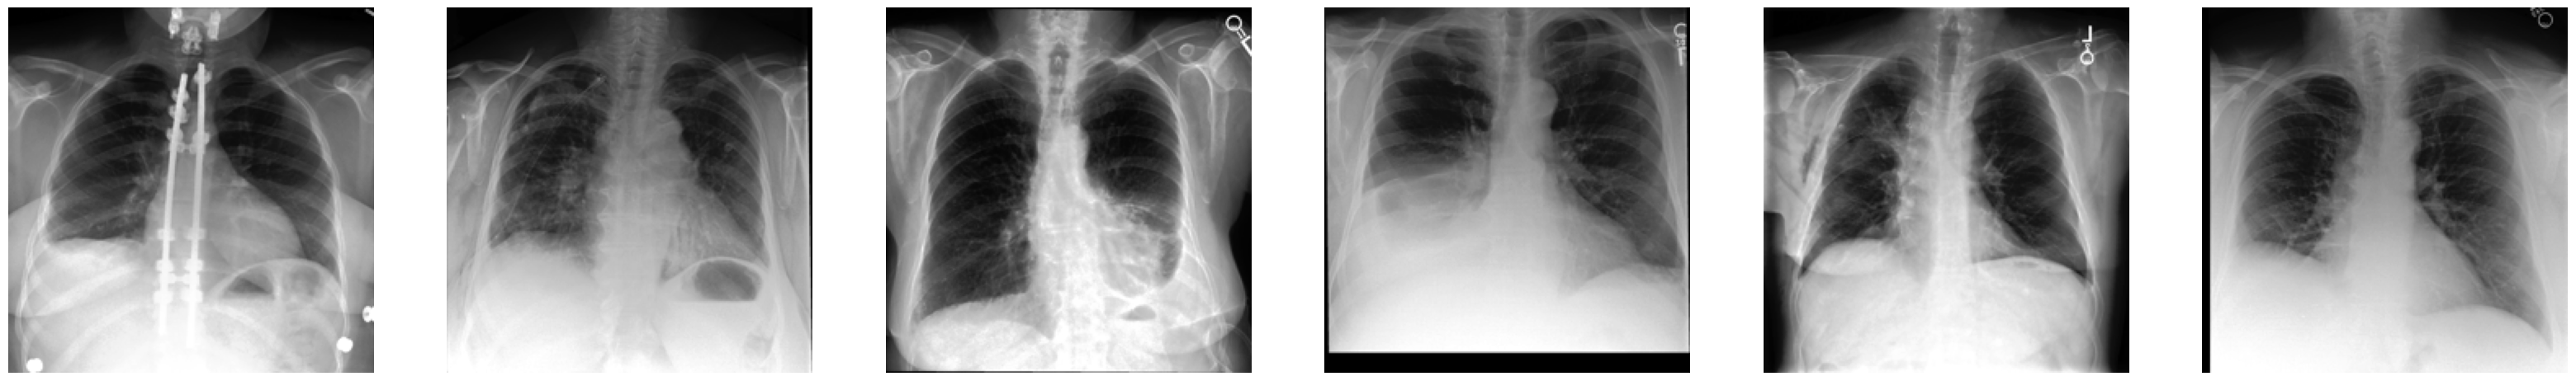

In [36]:
# plot images with target labels = 1
idx, el = np.where(test_dict['labels'].fillna(0).astype(int) == 1)
plot_n_imgs(imgs=test_dict['images'][idx][0:6],n_cols=6,n_rows=1, size=(40,40))

In [37]:
test_dict['labels'].fillna(0).astype(int)


,Support Devices
0,0
1,0
2,0
3,0
4,0
...,...
8612,0
8613,0
8614,0
8615,0


In [38]:
idx

array([  10,   39,  118,  122,  142,  146,  149,  167,  183,  185,  188,
        248,  256,  260,  280,  287,  325,  335,  336,  342,  344,  357,
        379,  384,  415,  431,  462,  473,  477,  525,  552,  569,  599,
        604,  658,  706,  716,  719,  733,  756,  758,  776,  786,  787,
        808,  821,  823,  831,  846,  848,  878,  879,  880,  887,  892,
        911,  921,  932,  945,  947,  969, 1005, 1012, 1013, 1036, 1037,
       1046, 1055, 1068, 1108, 1128, 1148, 1161, 1173, 1196, 1197, 1241,
       1242, 1245, 1250, 1255, 1273, 1278, 1284, 1295, 1328, 1379, 1406,
       1412, 1437, 1479, 1482, 1483, 1496, 1509, 1510, 1532, 1554, 1557,
       1568, 1588, 1590, 1652, 1678, 1686, 1692, 1703, 1745, 1765, 1779,
       1783, 1813, 1835, 1892, 1904, 1914, 1920, 1922, 1950, 1992, 2007,
       2025, 2057, 2069, 2088, 2134, 2135, 2136, 2161, 2166, 2176, 2227,
       2241, 2250, 2265, 2275, 2281, 2299, 2308, 2323, 2382, 2384, 2393,
       2408, 2411, 2434, 2452, 2464, 2497, 2500, 25

In [39]:
test_dict['dicom_ids'][idx]

10      8c213619-fccdc64f-857e6506-adcdc908-67de5326
39      24576d55-4cdc4874-729ddeaa-15966dc3-5ba0789b
118     a8726b73-13041123-cf731d71-4f732944-3b4008f6
122     b561c00b-167831b2-8bdf0c87-35642777-7d912fe3
142     7c829940-c1e84549-4662d678-31948627-337ff853
                            ...                     
8506    8e5dfd7b-d1f00e75-cdb11f23-7863b205-4ad70529
8528    a0460284-78a8d2aa-6663c64e-304e2f3c-96e95850
8582    8f61f221-775ecbc9-1afee268-4493ac06-c3c8e32d
8597    05d5a0de-ff6b9b3b-227dee6b-dac55d90-0835055c
8609    d122eb74-bc404dd2-45a05cd3-18505b72-5058fbdd
Name: dicom_id, Length: 485, dtype: object

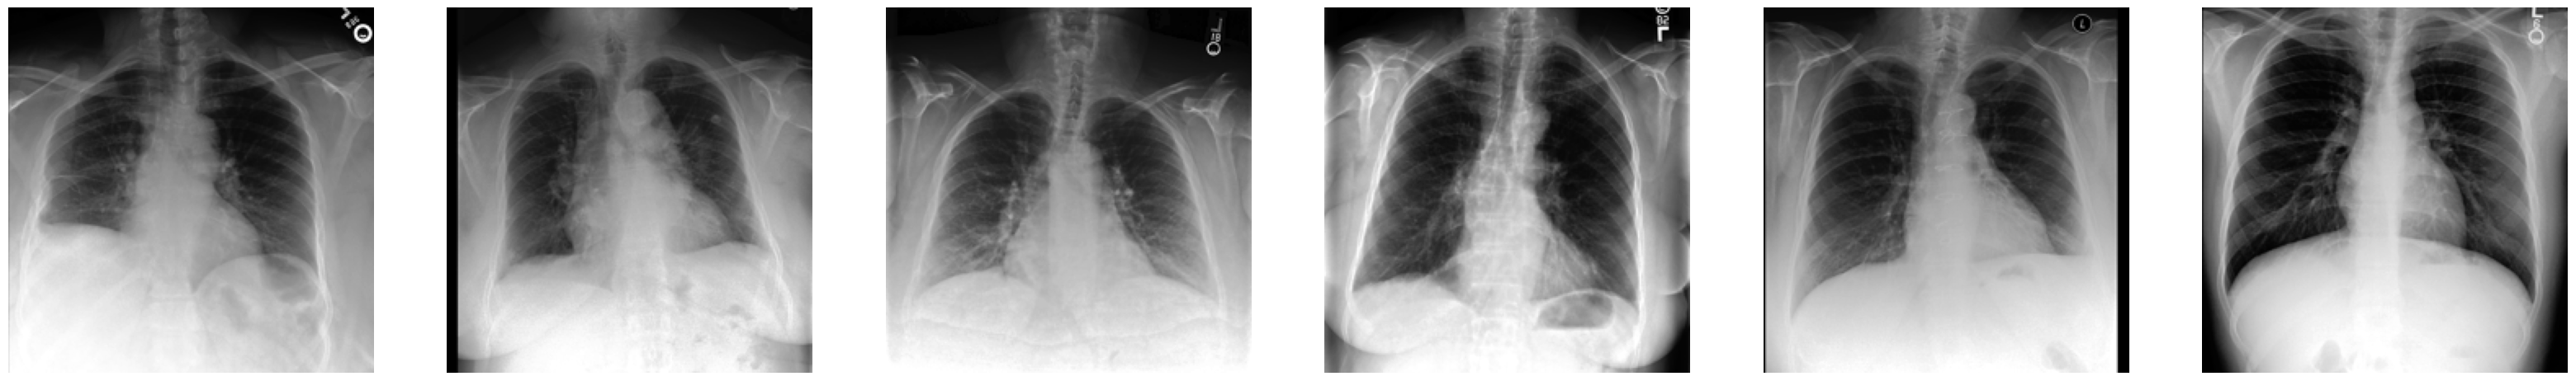

In [31]:
# plot images with target labels = 0
idx, el = np.where(train_dict['labels'].fillna(0).astype(int) == 0)
plot_n_imgs(imgs=train_dict['images'][idx][0:6],n_cols=6,n_rows=1, size=(40,40))

In [26]:
train_dict['dicom_ids'][idx]

0        f1adcae3-2921c0a8-5d9652f9-4191ecd7-f2a96f35
1        925b9496-a956d7b2-05185e52-bb33313b-c06ee522
2        ed9c0dfc-ea25b576-0f8cc069-df4cdf14-0cd60eb7
3        2d8a8525-19d0c810-045e1619-ef196132-cd4f1710
4        ab37274f-b4c1fc04-e2ff24b4-4a130ba3-cd167968
                             ...                     
25844    9c390b59-c804f98f-d294205c-60530957-c8107dac
25845    12fad032-cf4eff00-32a4fc65-67e424b6-a2e42afb
25846    4750f069-a4a2b152-61dadb2b-8e7c09a6-1c0578c2
25847    8dc9f5e1-14887015-8db378ef-2fd4441a-d45ee0f3
25848    428e2c18-5721d8f3-35a05001-36f3d080-9053b83c
Name: dicom_id, Length: 24428, dtype: object